In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

#import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
#from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Tess="E:/ML Lab/archive (4)/"

In [3]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

data_path=Tess_df

In [4]:

data_path.describe

<bound method NDFrame.describe of      Emotions                                               Path
0       angry  E:/ML Lab/archive (4)/OAF_angry/OAF_back_angry...
1       angry  E:/ML Lab/archive (4)/OAF_angry/OAF_bar_angry.wav
2       angry  E:/ML Lab/archive (4)/OAF_angry/OAF_base_angry...
3       angry  E:/ML Lab/archive (4)/OAF_angry/OAF_bath_angry...
4       angry  E:/ML Lab/archive (4)/OAF_angry/OAF_bean_angry...
...       ...                                                ...
2795      sad    E:/ML Lab/archive (4)/YAF_sad/YAF_witch_sad.wav
2796      sad    E:/ML Lab/archive (4)/YAF_sad/YAF_yearn_sad.wav
2797      sad      E:/ML Lab/archive (4)/YAF_sad/YAF_yes_sad.wav
2798      sad    E:/ML Lab/archive (4)/YAF_sad/YAF_young_sad.wav
2799      sad    E:/ML Lab/archive (4)/YAF_sad/YAF_youth_sad.wav

[2800 rows x 2 columns]>

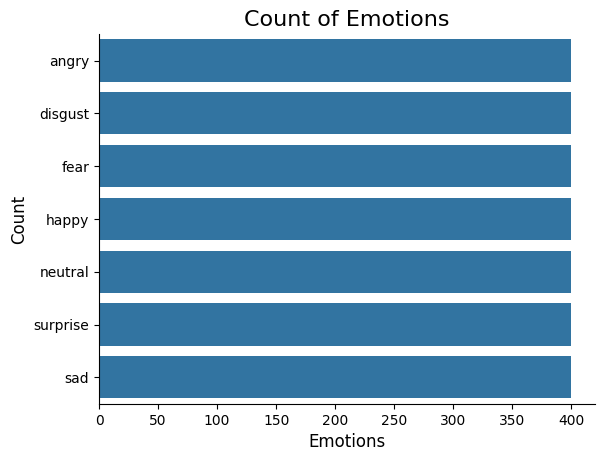

In [5]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path["Emotions"])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [6]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(y=data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

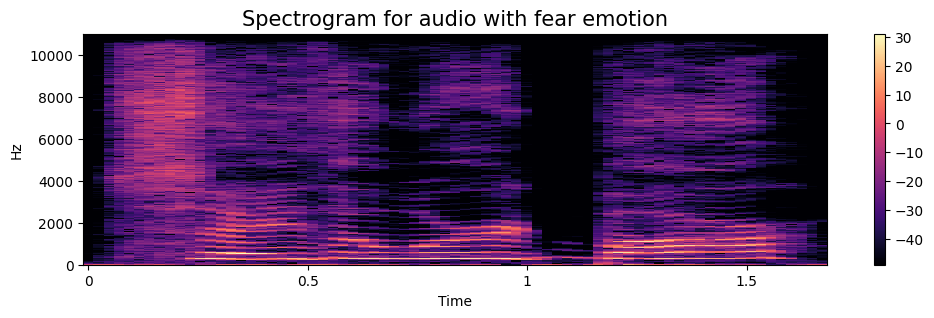

In [7]:
emotion='fear'
path = np.array(data_path.Path[data_path["Emotions"]==emotion])[1]
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

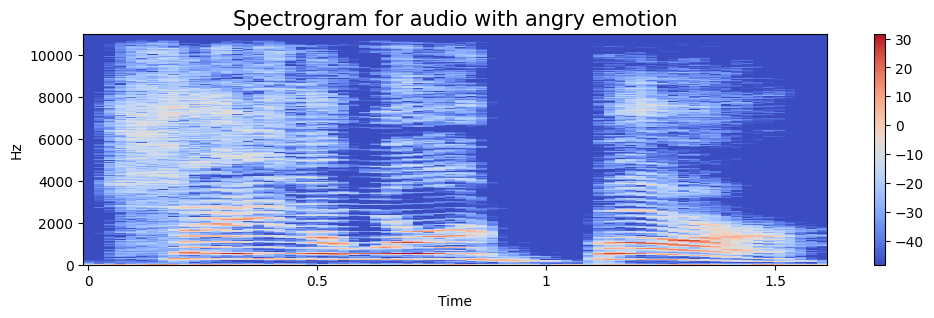

In [8]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

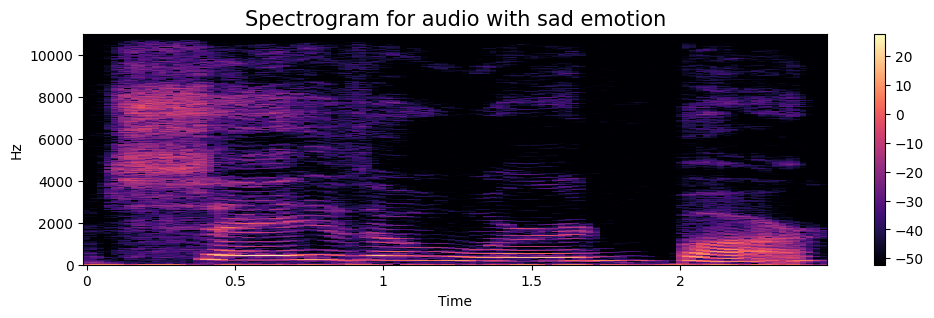

In [9]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

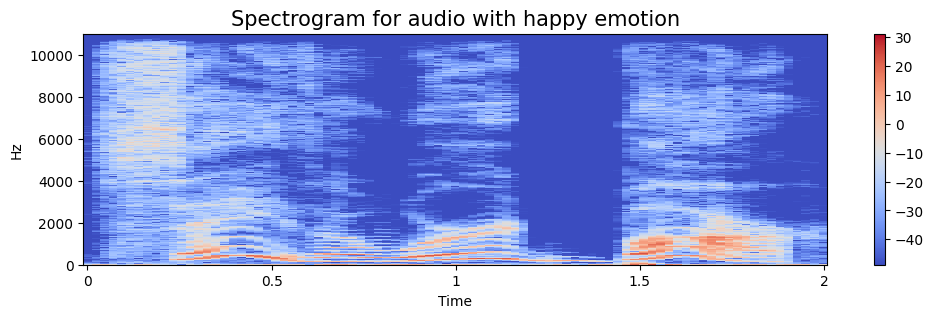

In [10]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
#create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


In [11]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data,rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=0.7)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [12]:
plt.figure(figsize=(14,4))
#librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

<Figure size 1400x400 with 0 Axes>

In [13]:
x = noise(data)
plt.figure(figsize=(14,4))
#librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

In [14]:
x = stretch(data)
plt.figure(figsize=(14,4))
#librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

In [15]:
x = shift(data)
plt.figure(figsize=(14,4))
#librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

In [16]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
#librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<Figure size 1400x400 with 0 Axes>

In [17]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [18]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

len(X), len(Y), data_path.Path.shape

(8400, 8400, (2800,))

In [19]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.054342,0.538993,0.596808,0.396304,0.364695,0.441099,0.413557,0.373404,0.568096,0.573010,...,0.000105,0.000157,0.000185,0.000133,0.000134,0.000070,0.000038,0.000034,6.250596e-06,angry
1,0.096120,0.685951,0.567263,0.445205,0.493832,0.558916,0.416422,0.506394,0.683915,0.534755,...,0.000168,0.000215,0.000256,0.000192,0.000208,0.000144,0.000106,0.000100,6.874188e-05,angry
2,0.073797,0.544288,0.592730,0.374030,0.335800,0.388966,0.397715,0.296939,0.535087,0.623333,...,0.000029,0.000026,0.000024,0.000037,0.000041,0.000037,0.000024,0.000007,3.829297e-07,angry
3,0.058006,0.635519,0.406851,0.370775,0.404711,0.507197,0.455434,0.395454,0.421722,0.353537,...,0.000115,0.000082,0.000030,0.000011,0.000015,0.000021,0.000019,0.000015,9.260864e-07,angry
4,0.246771,0.789274,0.745240,0.581543,0.575600,0.611952,0.583939,0.466071,0.487424,0.526410,...,0.002271,0.002345,0.002294,0.002245,0.002219,0.002302,0.002364,0.002224,2.151663e-03,angry


In [20]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [21]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162), (6300, 7), (2100, 162), (2100, 7))

In [22]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162), (6300, 7), (2100, 162), (2100, 7))

In [23]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162, 1), (6300, 7), (2100, 162, 1), (2100, 7))

In [28]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 81, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 21, 128)          

In [26]:
from keras.utils import to_categorical

# Assuming y_train and y_test are your label arrays
num_classes = 8

y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [29]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train,epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50


197/197 [==============================] - 41s 187ms/step - loss: 1.3742 - accuracy: 0.4651 - val_loss: 0.7426 - val_accuracy: 0.7024 - lr: 0.0010
Epoch 2/50
197/197 [==============================] - 35s 180ms/step - loss: 0.6541 - accuracy: 0.7629 - val_loss: 0.3058 - val_accuracy: 0.9081 - lr: 0.0010
Epoch 3/50
197/197 [==============================] - 36s 184ms/step - loss: 0.4352 - accuracy: 0.8543 - val_loss: 0.1999 - val_accuracy: 0.9362 - lr: 0.0010
Epoch 4/50
197/197 [==============================] - 31s 156ms/step - loss: 0.2972 - accuracy: 0.9021 - val_loss: 0.1491 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 5/50
197/197 [==============================] - 55s 282ms/step - loss: 0.2291 - accuracy: 0.9233 - val_loss: 0.1397 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 6/50
197/197 [==============================] - 27s 138ms/step - loss: 0.2085 - accuracy: 0.9311 - val_loss: 0.1257 - val_accuracy: 0.9581 - lr: 0.0010
Epoch 7/50
197/197 [==============================

66/66 [==============================] - 3s 40ms/step - loss: 0.0552 - accuracy: 0.9833
Accuracy of our model on test data :  98.33333492279053 %


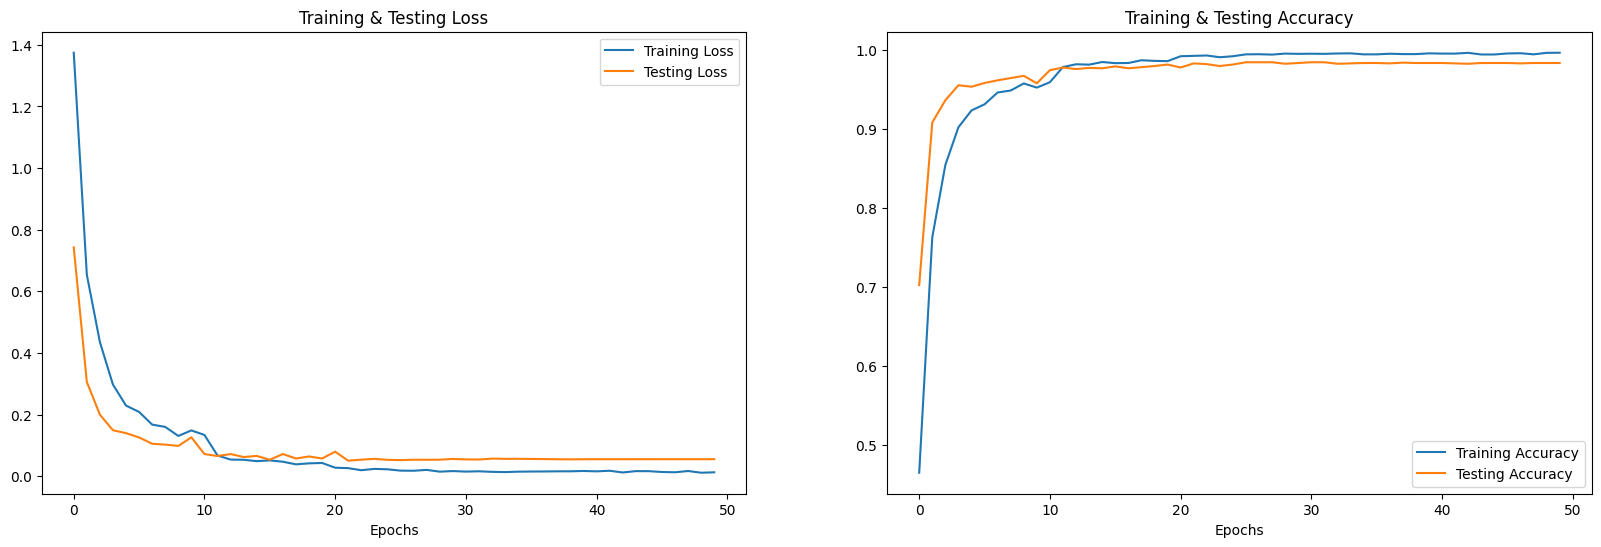

In [30]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [1]:
model.save("audio.h5")

NameError: name 'model' is not defined

In [32]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

66/66 [==============================] - 3s 36ms/step


,Predicted Labels,Actual Labels
0,neutral,neutral
1,surprise,surprise
2,neutral,neutral
3,happy,happy
4,surprise,surprise
5,fear,fear
6,fear,fear
7,sad,sad
8,disgust,disgust
9,fear,fear
